In [1]:
import pandas as pd
import numpy as np
import requests
import folium
from io import StringIO
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

### Loading the data

In [2]:
# Loading data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
riders = pd.read_csv('Riders.csv')

In [3]:
train.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target
0,ID_SCUW21PVAU,4435,27,6,9:02:54,593630,Business,0,2,Bike,...,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,...,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,...,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,...,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,...,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0


In [4]:
test.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long
0,ID_3B4D2Q2DSI,28636,2,6,12:10:59,593630,Business,0,2,Bike,57224,1,1,450,-42.912776,-17.265738,-42.881861,-17.280865,-42.880476,-17.230240
1,ID_7MPWFJ9XFI,60465,11,4,17:10:03,2378775,Personal,1,2,Bike,106329,1,1,560,-42.831932,-17.284140,-42.829545,-17.279453,-42.851920,-17.314558
2,ID_5VVT3Q3M5B,25249,30,3,12:02:01,2121681,Personal,0,2,Bike,90551,0,0,450,-42.806437,-17.285166,-42.810915,-17.291086,-42.807165,-17.253860
3,ID_C2GTVS1H7K,21224,27,2,11:10:32,38801,Business,0,2,Bike,90482,1,1,440,-42.828448,-17.301909,-42.828517,-17.302052,-42.795516,-17.287921
4,ID_0YGC8V3PFT,58287,14,6,16:12:55,153111,Business,0,2,Bike,101959,1,1,500,-42.808912,-17.259955,-42.805154,-17.262939,-42.706475,-17.257454


In [5]:
riders.head()

,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,16261,308,21.05,321
1,8832,224,10.00,27
2,53866,238,17.76,25
3,46368,343,24.56,320
4,45609,399,14.97,214


In [6]:
train.shape, test.shape

((179867, 21), (76791, 20))

In [7]:
train.columns

Index(['ID', 'order_id', 'dispatch_day', 'dispatch_day_of_week',
       'dispatch_time', 'client_id', 'client_type', 'order_license_status',
       'order_carrier_type', 'vendor_type', 'rider_id', 'rider_license_status',
       'rider_carrier_type', 'rider_amount', 'rider_lat', 'rider_long',
       'pickup_lat', 'pickup_long', 'drop_off_lat', 'drop_off_long', 'target'],
      dtype='object')

In [8]:
test.columns

Index(['ID', 'order_id', 'dispatch_day', 'dispatch_day_of_week',
       'dispatch_time', 'client_id', 'client_type', 'order_license_status',
       'order_carrier_type', 'vendor_type', 'rider_id', 'rider_license_status',
       'rider_carrier_type', 'rider_amount', 'rider_lat', 'rider_long',
       'pickup_lat', 'pickup_long', 'drop_off_lat', 'drop_off_long'],
      dtype='object')

### Check for null values

In [9]:
train.isnull().sum()

ID                      0
order_id                0
dispatch_day            0
dispatch_day_of_week    0
dispatch_time           0
client_id               0
client_type             0
order_license_status    0
order_carrier_type      0
vendor_type             0
rider_id                0
rider_license_status    0
rider_carrier_type      0
rider_amount            0
rider_lat               0
rider_long              0
pickup_lat              0
pickup_long             0
drop_off_lat            0
drop_off_long           0
target                  0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179867 entries, 0 to 179866
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    179867 non-null  object 
 1   order_id              179867 non-null  int64  
 2   dispatch_day          179867 non-null  int64  
 3   dispatch_day_of_week  179867 non-null  int64  
 4   dispatch_time         179867 non-null  object 
 5   client_id             179867 non-null  int64  
 6   client_type           179867 non-null  object 
 7   order_license_status  179867 non-null  int64  
 8   order_carrier_type    179867 non-null  int64  
 9   vendor_type           179867 non-null  object 
 10  rider_id              179867 non-null  int64  
 11  rider_license_status  179867 non-null  int64  
 12  rider_carrier_type    179867 non-null  int64  
 13  rider_amount          179867 non-null  int64  
 14  rider_lat             179867 non-null  float64
 15  

### Statistical description 

In [11]:
train.describe()

,order_id,dispatch_day,dispatch_day_of_week,client_id,order_license_status,order_carrier_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target
count,179867.000000,179867.000000,179867.000000,1.798670e+05,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000
mean,32639.833149,16.604903,4.185198,4.654108e+05,0.239555,1.619007,70389.969944,0.589936,0.868731,517.544185,-42.817124,-17.286813,-42.817156,-17.286229,-42.814879,-17.282547,0.652843
std,18227.428596,8.528368,1.683574,6.634234e+05,0.426813,0.536552,33981.806096,0.491846,0.337695,157.385430,0.106837,0.100707,0.106425,0.100101,0.114158,0.103640,0.791099
min,100.000000,1.000000,1.000000,2.610000e+02,0.000000,0.000000,1817.000000,0.000000,0.000000,200.000000,-45.736540,-20.079067,-45.725110,-20.070241,-45.793523,-20.352897,0.000000
25%,16875.000000,9.000000,3.000000,7.564700e+04,0.000000,1.000000,40756.000000,0.000000,1.000000,410.000000,-42.832252,-17.301329,-42.829119,-17.299970,-42.830628,-17.301066,0.000000
50%,32964.000000,17.000000,4.000000,1.434280e+05,0.000000,2.000000,73485.000000,1.000000,1.000000,460.000000,-42.813961,-17.286776,-42.820037,-17.283554,-42.806976,-17.282880,0.000000
75%,48117.000000,24.000000,6.000000,5.936300e+05,0.000000,2.000000,100441.000000,1.000000,1.000000,570.000000,-42.791405,-17.264774,-42.789742,-17.263246,-42.783811,-17.259310,1.000000
max,64427.000000,31.000000,7.000000,2.568456e+06,1.000000,2.000000,123694.000000,1.000000,1.000000,2190.000000,-40.676917,-15.480446,-40.699055,-15.482671,-40.683763,-15.324765,2.000000


In [12]:
#for categorical dtype
train.describe(include=['O'])

,ID,dispatch_time,client_type,vendor_type
count,179867,179867,179867,179867
unique,179867,5636,2,1
top,ID_VM8XW1NMIO,15:12:12,Business,Bike
freq,1,95,145902,179867


In [13]:
#Drop the vendortype column since there is only one unique value
train.drop('vendor_type',inplace=True,axis=1)
test.drop('vendor_type',inplace=True,axis=1)

In [14]:
train['client_type'].value_counts()

Business    145902
Personal     33965
Name: client_type, dtype: int64

### Convert the clienttype to numerical in both train and test

In [15]:
ctype = {'Personal':1,'Business':0}
train['client_type'] = train['client_type'].map(ctype)
test['client_type'] = test['client_type'].map(ctype)

### Convert dispatch time to datetime

In [16]:
test['dispatch_time'] = test['dispatch_time'].apply(pd.to_datetime )
train['dispatch_time'] = train['dispatch_time'].apply(pd.to_datetime )

In [ ]:
#train['dispatch_time'] = train['dispatch_time'].apply(pd.to_datetime ).astype(str)
#train['dispatch_time'] = pd.to_timedelta(train['dispatch_time']+':00')
#test['dispatch_time'] = pd.to_timedelta(test['dispatch_time']+':00')

In [17]:
train.dtypes

ID                              object
order_id                         int64
dispatch_day                     int64
dispatch_day_of_week             int64
dispatch_time           datetime64[ns]
client_id                        int64
client_type                      int64
order_license_status             int64
order_carrier_type               int64
rider_id                         int64
rider_license_status             int64
rider_carrier_type               int64
rider_amount                     int64
rider_lat                      float64
rider_long                     float64
pickup_lat                     float64
pickup_long                    float64
drop_off_lat                   float64
drop_off_long                  float64
target                           int64
dtype: object

In [18]:
test.dtypes

ID                              object
order_id                         int64
dispatch_day                     int64
dispatch_day_of_week             int64
dispatch_time           datetime64[ns]
client_id                        int64
client_type                      int64
order_license_status             int64
order_carrier_type               int64
rider_id                         int64
rider_license_status             int64
rider_carrier_type               int64
rider_amount                     int64
rider_lat                      float64
rider_long                     float64
pickup_lat                     float64
pickup_long                    float64
drop_off_lat                   float64
drop_off_long                  float64
dtype: object

### Merge the rider dataframe to both train and test

In [19]:
riders.isnull().sum()

Rider ID                  0
Active Rider Age          0
Average Partner Rating    0
Number of Ratings         0
dtype: int64

In [20]:
riders.rename(columns={'Rider ID': 'rider_id'}, inplace=True)

In [21]:
riders.columns

Index(['rider_id', 'Active Rider Age', 'Average Partner Rating',
       'Number of Ratings'],
      dtype='object')

In [22]:
train = pd.merge(train,riders,on='rider_id',how='left')
test = pd.merge(test,riders,on='rider_id',how='left')

In [23]:
train.shape, test.shape

((179867, 23), (76791, 22))

## Data visualization

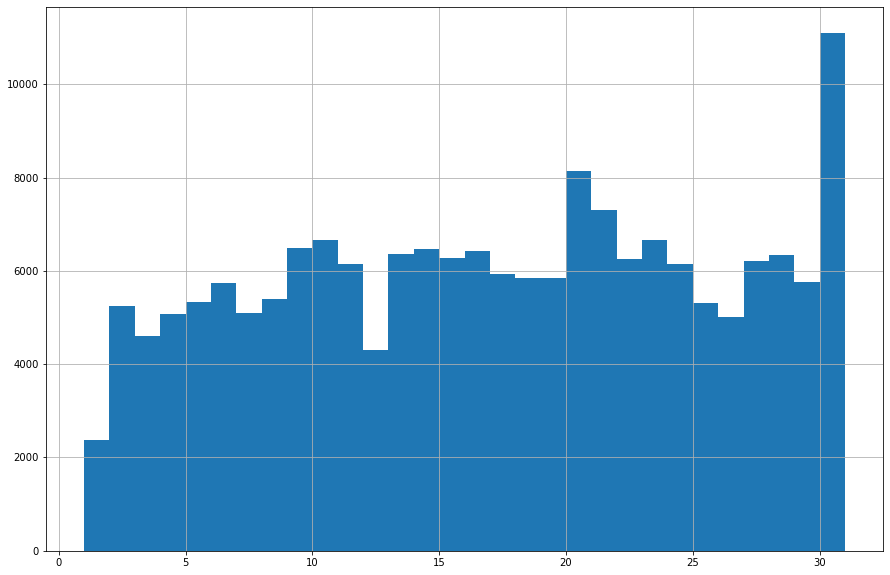

In [24]:
hist_temp = train.dispatch_day.hist(bins=30,figsize=[15,10])

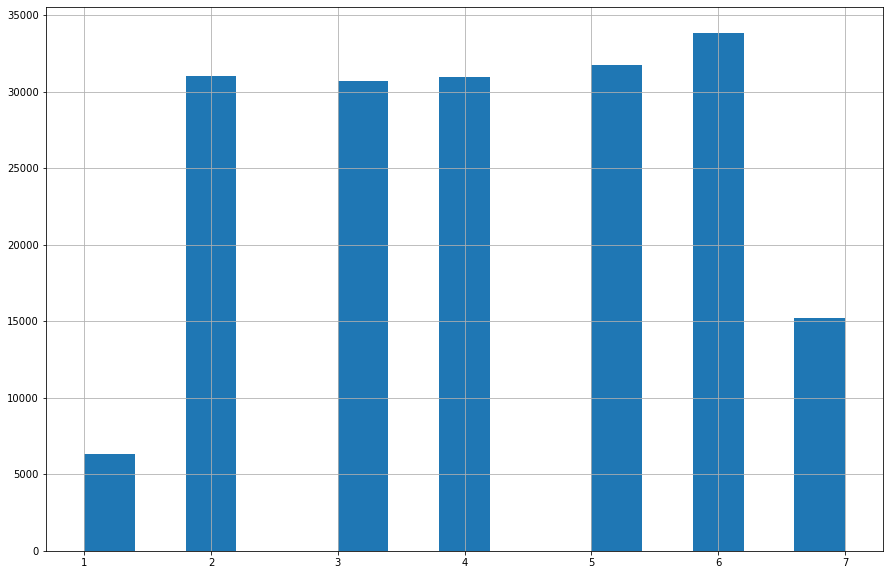

In [25]:
hist_temp = train.dispatch_day_of_week.hist(bins=15,figsize=[15,10]) #days with the most dispatches

#### Are most dispatches business or personal

<AxesSubplot:>

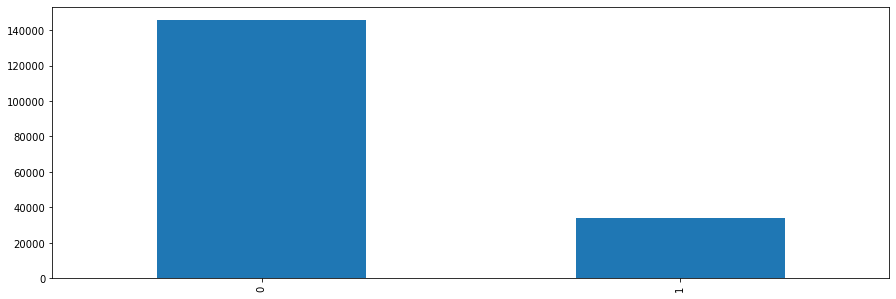

In [26]:
train['client_type'].value_counts().plot(kind='bar',figsize=[15,5])

<AxesSubplot:>

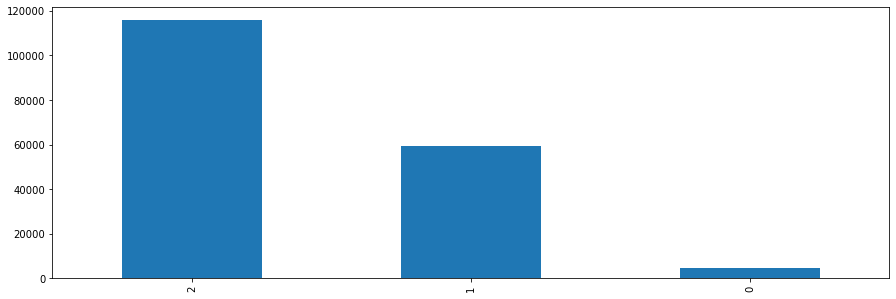

In [27]:
train['order_carrier_type'].value_counts().plot(kind='bar',figsize=[15,5])

<AxesSubplot:>

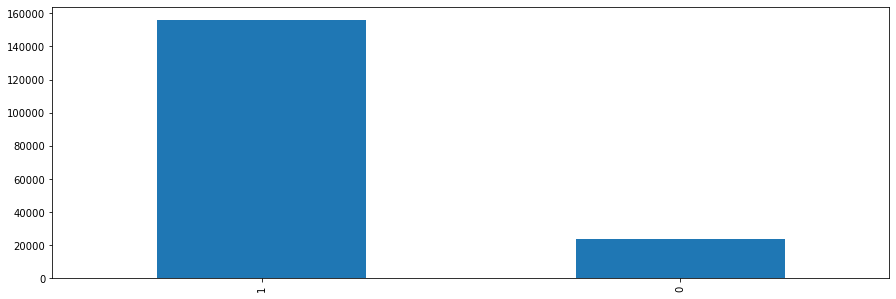

In [28]:
train['rider_carrier_type'].value_counts().plot(kind='bar',figsize=[15,5])

## Visualisation of Pickup , Rider and Dropoff location using longitude and latitude data

##### Run the map cell to view geolocation

<AxesSubplot:xlabel='pickup_lat', ylabel='pickup_long'>

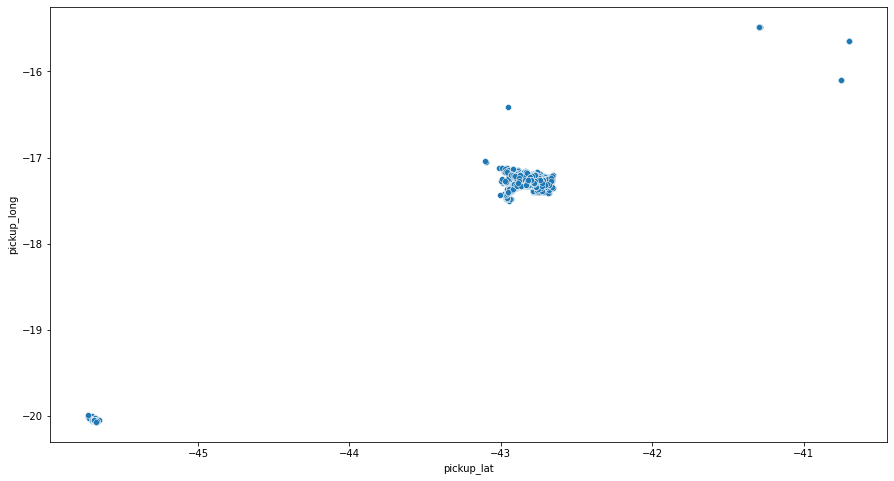

In [29]:
plt.figure(figsize = (15,8))
sns.scatterplot(train['pickup_lat'], train['pickup_long'])

In [ ]:
# create the map.
map_pickup = folium.Map( location=[-1.317755,36.830370])

# adding the latitude and longitude points to the map.
train.apply(lambda row:folium.CircleMarker(location=[row['pickup_lat'], row['pickup_long']] ).add_to(map_pickup), axis=1)

map_pickup

#map_pickup.save('map_pickup.html')

### Riders 

<AxesSubplot:xlabel='rider_lat', ylabel='rider_long'>

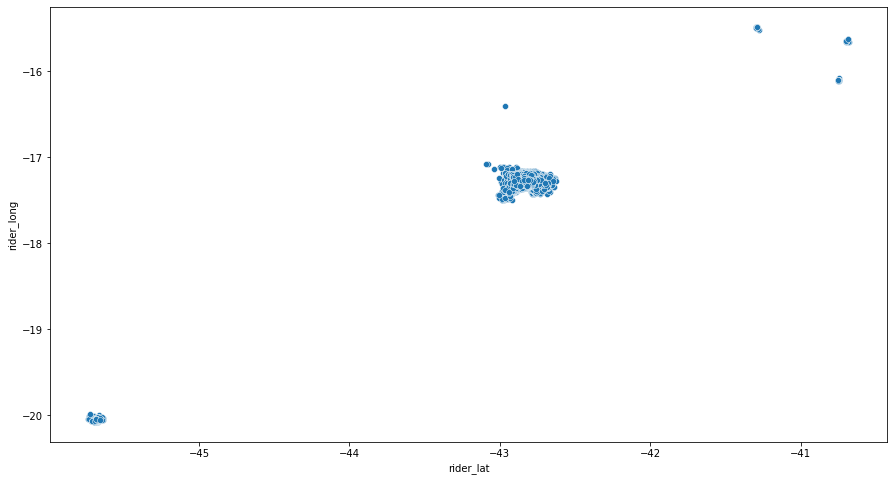

In [30]:
plt.figure(figsize = (15,8))
sns.scatterplot(train['rider_lat'], train['rider_long'])

In [ ]:
map_riders = folium.Map( location=[-1.317755,36.830370])
train.apply(lambda row:folium.CircleMarker(location=[row['rider_lat'], row['rider_long']] ).add_to(map_riders), axis=1)
map_riders

#map_riders.save('map_riders.html')

### Dropoff

<AxesSubplot:xlabel='drop_off_lat', ylabel='drop_off_long'>

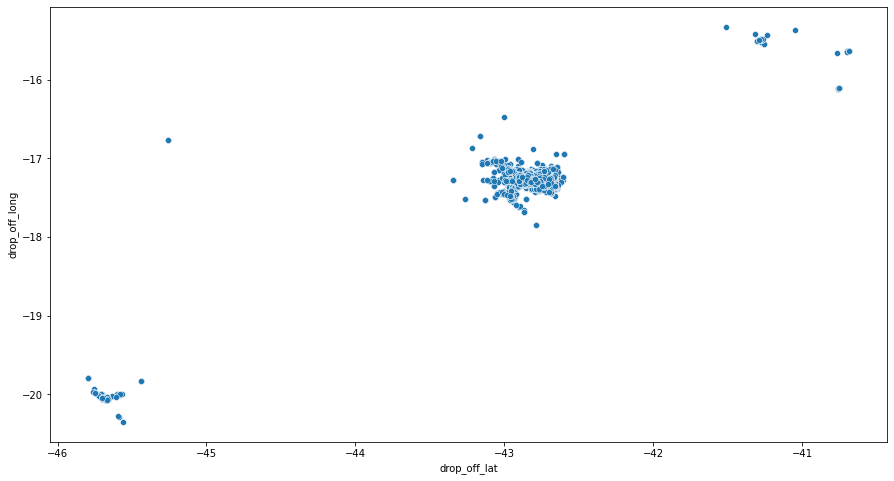

In [31]:
plt.figure(figsize = (15,8))
sns.scatterplot(train['drop_off_lat'], train['drop_off_long'])

In [ ]:
map_dropoff = folium.Map( location=[-1.317755,36.830370])
train.apply(lambda row:folium.CircleMarker(location=[row['rider_lat'], row['rider_long']] ).add_to(map_dropoff), axis=1)

map_dropoff

#map_dropoff.save('map_dropoff.html')

In [32]:
print('Number of unique riders in train set : %i and in test set : %i '%(len(train['rider_id'].unique()),len(test['rider_id'].unique())))

Number of unique riders in train set : 764 and in test set : 718 


In [33]:
riderstrainonly = len(train[~(train['rider_id'].isin(test['rider_id'].unique()))]['rider_id'].unique())
riderstestonly = len(test[~(test['rider_id'].isin(train['rider_id'].unique()))]['rider_id'].unique())
print('Number of riders existing only in trainset? %i ; Number of riders only in test set? %i ' %(riderstrainonly,riderstestonly))

Number of riders existing only in trainset? 57 ; Number of riders only in test set? 11 


### Correlation

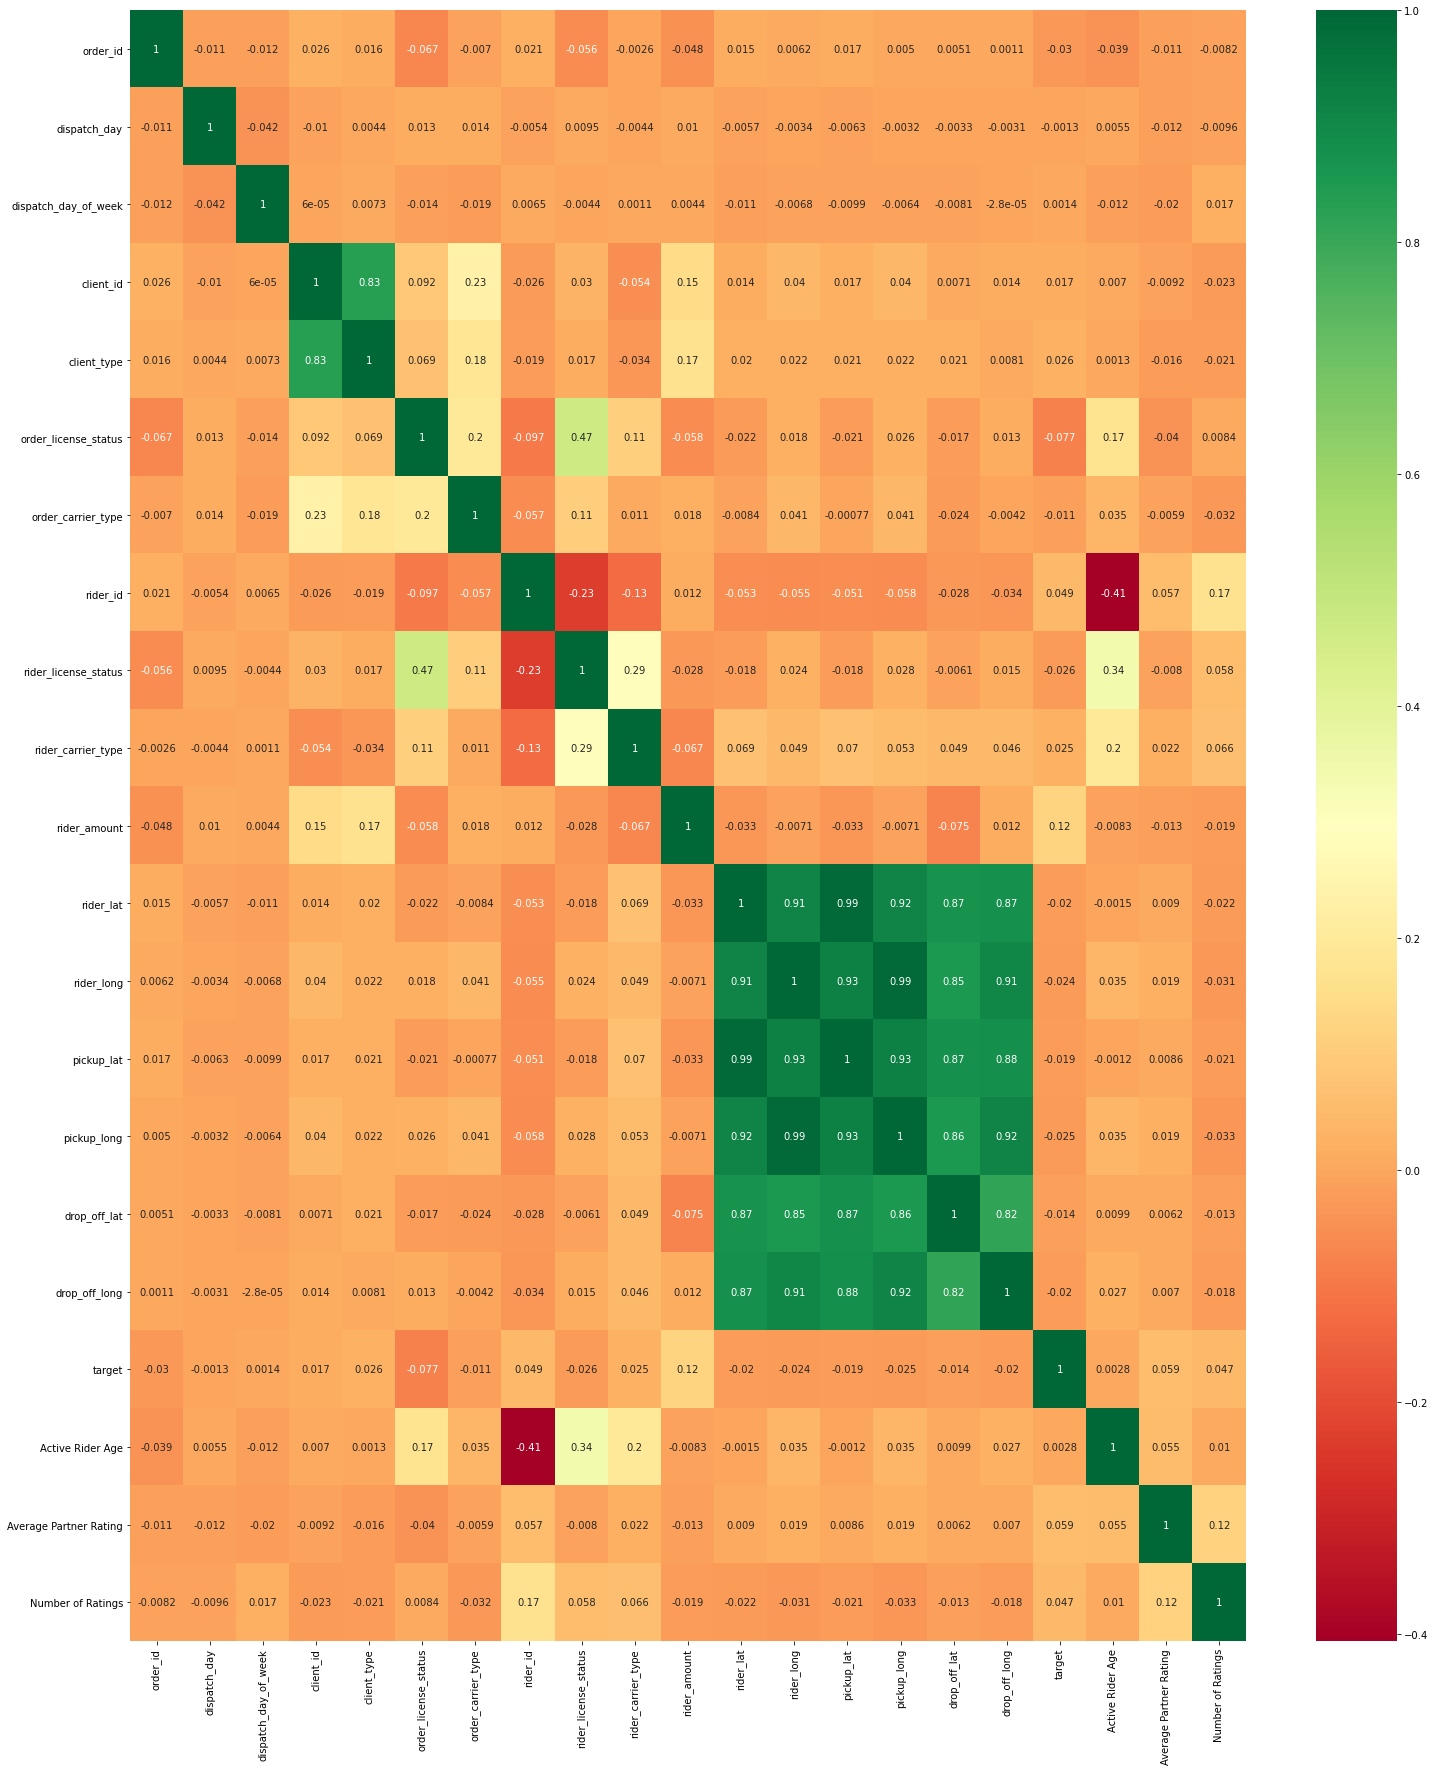

In [34]:
corrmat = train.corr()
top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
rcParams['figure.figsize'] = 25, 30
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Model selection and fitting

In [35]:
X = train.drop(columns=['ID', 'target'],axis=1)

In [36]:
y = train['target']

In [37]:
test1=test.drop(columns=['ID'],axis=1)

In [38]:
pred_test = np.zeros(len(test))
from sklearn.model_selection import KFold
fold=KFold(n_splits=4)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb_model = xgb.XGBClassifier(num_class=7,
                                  learning_rate=0.1,
                                  num_iterations=1000,
                                  max_depth=10,
                                  feature_fraction=0.7, 
                                  scale_pos_weight=1.5,
                                  boosting='gbdt',
                                  metric='multiclass',
                                  eval_metric='mlogloss',
                                  n_jobs = 1,
                                  verbosity= 0)
    xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))

    #xgb_model.fit(X_train,y_train)
    #preds=xgb_model.predict(X_test._get_numeric_data())
    y_pred_xgb = xgb_model.predict(X_test._get_numeric_data())

    s1 = f1_score(y_test,y_pred_xgb,average = 'weighted')
    
    p2 = xgb_model.predict(test1._get_numeric_data())
    pred_test+=p2

In [39]:
p2.shape

(76791,)

In [40]:
submission_df = pd.DataFrame(p2, columns = ['Target'])
print(submission_df)

       Target
0           0
1           0
2           0
3           0
4           0
...       ...
76786       0
76787       0
76788       0
76789       1
76790       0

[76791 rows x 1 columns]


In [41]:
submission_df = submission_df.join(test['ID'])

In [42]:
cols = submission_df.columns.tolist()

In [43]:
submission_df = submission_df[cols]

In [45]:
submission_df.to_csv('submission.csv', index=False)